# Using the Exploratory Functions

This notebook contains examples of how to use the Exploratory module to do exploratory data analysis on your data.

In [1]:
from eagles.data_sets import data_loader as dl
from eagles.Exploratory import missing

import numpy as np

In [2]:
wines = dl.load_wines()
print(wines.shape)

(178, 14)


To make the data a little more realistic I'll add in some missing data.

In [3]:
wines = wines.mask(np.random.random(wines.shape) < .1)

## Missing Data

In [4]:
missing.get_proportion_missing(df=wines, cols=[])

                                               column_name  percent_missing
hue                                                    hue        12.921348
class                                                class        12.359551
nonflavanoid_phenols                  nonflavanoid_phenols        12.359551
alcalinity_of_ash                        alcalinity_of_ash        11.797753
proline                                            proline        11.797753
malic_acid                                      malic_acid        10.674157
magnesium                                        magnesium        10.112360
ash                                                    ash         9.550562
OD280_OD315_of_diluted_wines  OD280_OD315_of_diluted_wines         9.550562
proanthocyanins                            proanthocyanins         8.988764
total_phenols                                total_phenols         7.865169
alcohol                                            alcohol         7.303371
color_intens

If you would like a plot as well to see if there are any trends in the missing data you can simply set plot=True

                                               column_name  percent_missing
hue                                                    hue        12.921348
class                                                class        12.359551
nonflavanoid_phenols                  nonflavanoid_phenols        12.359551
alcalinity_of_ash                        alcalinity_of_ash        11.797753
proline                                            proline        11.797753
malic_acid                                      malic_acid        10.674157
magnesium                                        magnesium        10.112360
ash                                                    ash         9.550562
OD280_OD315_of_diluted_wines  OD280_OD315_of_diluted_wines         9.550562
proanthocyanins                            proanthocyanins         8.988764
total_phenols                                total_phenols         7.865169
alcohol                                            alcohol         7.303371
color_intens

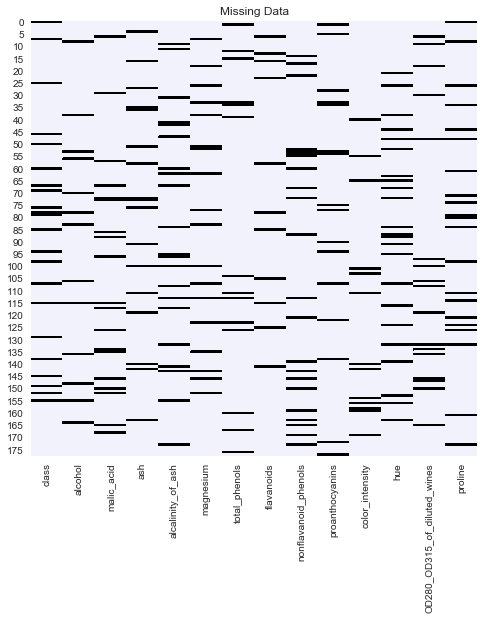

In [5]:
missing.get_proportion_missing(df=wines, cols=[], plot=True)